# AAI 695
### Fall 2023
### Homework 2
#### by Hossein Basereh Taramsari

# Step 1 Data Acquisition and Visualization (10 pts)

### (a) Download the “MNIST” dataset and extract the files. You will get four files with extension .gz (e.g., train-images-idx3-ubyte.gz). You can use the provided function read_idx below to read in the dataset. As its official description, the dataset is split into 60000 training images and 10000 images. The four file corresponds to the training images, training labels, testing images and testing labels. You need to print out their shape to finish this step. (5 pts)

In [1]:
import numpy as np
import gzip
import struct
import matplotlib.pyplot as plt

In [2]:
def read_idx(filename):
    with gzip.open(filename, "rb") as f:
        zero, data_type, dims = struct.unpack(">HBB", f.read(4))
        shape = tuple(struct.unpack(">I", f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Define the file paths for training and testing data
train_images_file = 'train-images-idx3-ubyte.gz'
train_labels_file = 'train-labels-idx1-ubyte.gz'
test_images_file = 't10k-images-idx3-ubyte.gz'
test_labels_file = 't10k-labels-idx1-ubyte.gz'

# Read and print the shapes of the dataset
train_images = read_idx(train_images_file)
train_labels = read_idx(train_labels_file)
test_images = read_idx(test_images_file)
test_labels = read_idx(test_labels_file)

print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Testing Images Shape:", test_images.shape)
print("Testing Labels Shape:", test_labels.shape)


Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Testing Images Shape: (10000, 28, 28)
Testing Labels Shape: (10000,)


### (b) To further understand what the dataset is, you need to use the ‘matplotlib’ library to print out a random data with code plt.imshow together with its label.(5 pts)

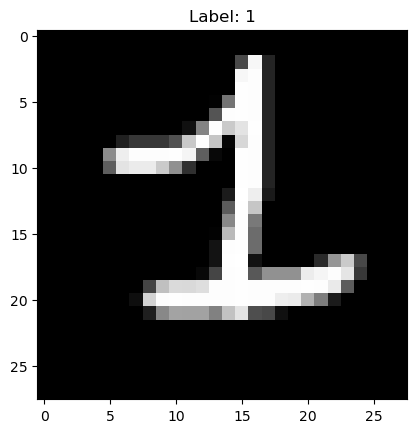

In [3]:
train_images_file = 'train-images-idx3-ubyte.gz'
train_labels_file = 'train-labels-idx1-ubyte.gz'

# Reading
train_images = read_idx(train_images_file)
train_labels = read_idx(train_labels_file)

# Random index
random_index = np.random.randint(0, len(train_images))

# Image and its label
random_image = train_images[random_index]
random_label = train_labels[random_index]

# Display
plt.imshow(random_image, cmap='gray')
plt.title(f"Label: {random_label}")
plt.show()

# Step 2 Data Preprocessing (10 pts)

### (a) Normalize the pixel values of images to be between 0 and 1. (5 pts)

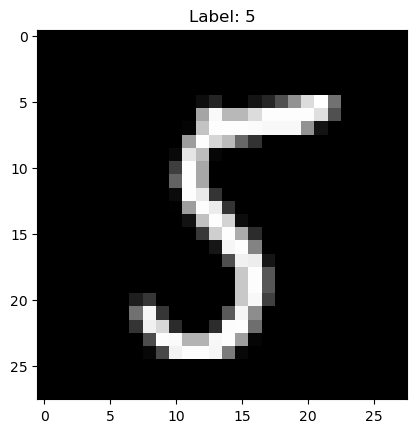

In [4]:
# Normalization: Min-Max Scaling
# Since pixel values are typically in the range of 0 to 255 in grayscale images (0 for black, 255 for white)
# dividing by 255 scales the pixel values to be between 0 and 1.  

normalized_train_images = train_images / 255.0

# Random index to check
random_index = np.random.randint(0, len(train_images))

# Image and its label
random_image = normalized_train_images[random_index]
random_label = train_labels[random_index]

# Display
plt.imshow(random_image, cmap='gray')
plt.title(f"Label: {random_label}")
plt.show()

### (b) Convert the labels from categorical data into numerical values using one-hot encoding. (5 pts) hint: you can explore the eye function in Numpy.

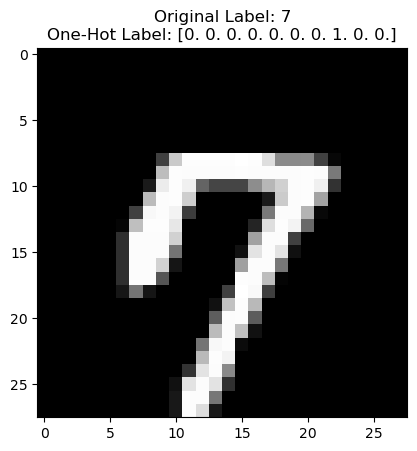

In [5]:
# Converting
num_classes = 10  
one_hot_train_labels = np.eye(num_classes)[train_labels]

# Random index
random_index = np.random.randint(0, len(train_images))

random_image = normalized_train_images[random_index]
one_hot_label = one_hot_train_labels[random_index]
original_label = train_labels[random_index]

# Display
plt.imshow(random_image, cmap='gray')
plt.title(f"Original Label: {original_label}\nOne-Hot Label: {one_hot_label}")
plt.show()

# Step 3 Network Initialization (10 pts)

### We will work with a neuron network with two hidden layers, using Sigmoid function as the activation functions for hidden layers and softmax activation function for the output layer. To finish this, you need to:

### (a) Identify the auxiliary input including the Sigmoid function and its derivative and Softmax function

In [6]:
# Sigmoid and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Softmax function
def softmax(z):
    e_z = np.exp(z - np.max(z))  # Subtracting max(z) for numerical stability
    return e_z / e_z.sum()

In [7]:
# Random index to check
random_index = np.random.randint(0, len(train_images))

random_image = normalized_train_images[random_index]
random_label = train_labels[random_index]
z = np.random.randn(10) 

# Sigmoid 
sigmoid_output = sigmoid(z)
sigmoid_derivative_output = sigmoid_derivative(z)

# Softmax 
softmax_output = softmax(z)

In [8]:
# Results
print("Original Label:", random_label)
print("Sigmoid Output:", sigmoid_output)
print("Sigmoid Derivative Output:", sigmoid_derivative_output)
print("Softmax Output:", softmax_output)

Original Label: 5
Sigmoid Output: [0.51320783 0.70479537 0.91375585 0.78079236 0.42760304 0.41036585
 0.76975578 0.28174773 0.66709118 0.13329406]
Sigmoid Derivative Output: [0.24982555 0.20805886 0.0788061  0.17115565 0.24475868 0.24196572
 0.17723182 0.20236595 0.22208054 0.11552675]
Softmax Output: [0.04228098 0.09574922 0.42490896 0.14284835 0.02995979 0.02791155
 0.13407864 0.01573181 0.08036284 0.00616786]


### (b) Initialize all the parameters in neural network uniformly. In this network, the input size is 784 dimensions (each input is a 28x28 image, so you have to flatten the data from 2D to 1D). For the two linear hidden layers, we have 128 and 64 neurons respectively. For the output layer, its size will be 10 since there are 10 classes (0-9) in MNIST. To finish this step, you need to initialize the weights and bias in random with a pre-set random seed using Numpy. Please set the seed value = 695. (5 pts)

In [9]:
# Random seed
np.random.seed(695)

# Parameters
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 64
output_layer_size = 10

# Hidden layer 1
W1 = np.random.uniform(-0.1, 0.1, size=(input_size, hidden_layer1_size))
b1 = np.zeros(hidden_layer1_size)

# Hidden layer 2
W2 = np.random.uniform(-0.1, 0.1, size=(hidden_layer1_size, hidden_layer2_size))
b2 = np.zeros(hidden_layer2_size)

# Output layer
W3 = np.random.uniform(-0.1, 0.1, size=(hidden_layer2_size, output_layer_size))
b3 = np.zeros(output_layer_size)

# Step 4 Feed Forward (10 pts)

### (a) Define a function named feed_forward. Given an input x, it should output the sigmoid of wx+b where w and b indicates the weights and bias defined in step 2. (5 pts)

In [10]:
def feed_forward(x):
    # Flatten the input image
    x_flat = x.flatten()

    # Hidden layer 1
    z1 = np.dot(x_flat, W1) + b1
    a1 = sigmoid(z1)

    # Hidden layer 2
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Output layer
    z3 = np.dot(a2, W3) + b3
    output = sigmoid(z3)

    return output, a1, a2, z1, z2, z3


In [11]:
output, a1, a2, z1, z2, z3 = feed_forward(random_image)
print("Neural Network Output:", output)

Neural Network Output: [0.53288812 0.5031332  0.50151813 0.53959415 0.44278096 0.54365261
 0.53000934 0.51400284 0.56841406 0.52262991]


# Step 5 Back Propagation (15 pts)

### (a) You need to compute the loss for the output layer first. Here, we use categorical cross entropy loss function given below for multi-class classification problem. (5 pts) Note, to achieve this, you need to first encode the categorical labels as numerical values using one-hot encoding finished in step 2. (5 pts)

In [12]:
def categorical_crossentropy(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)
    return -np.sum(y_true * np.log(y_pred_clipped)) / n_samples

In [13]:
loss = categorical_crossentropy(one_hot_label, output)
print("Categorical Crossentropy Loss:", loss)

Categorical Crossentropy Loss: 0.06655264884018587


### (b) Calculate the gradients for the weights and bias for each layer. Use the chain rule to compute gradients for previous layers. (10 pts)

In [14]:
# Gradients output layer
delta_output = output - one_hot_label
grad_W3 = np.dot(a2.reshape(-1, 1), delta_output.reshape(1, -1))
grad_b3 = np.sum(delta_output, axis=0)


grad_W3
grad_b3

4.198623315754842

In [15]:
# Gradients hidden layer 2
delta_a2 = np.dot(delta_output, W3.T)
delta_z2 = delta_a2 * sigmoid_derivative(z2)
grad_W2 = np.dot(a1.reshape(-1, 1), delta_z2.reshape(1, -1))
grad_b2 = np.sum(delta_z2, axis=0)

grad_W2
grad_b2

0.19109794606098962

In [16]:
# Gradients hidden layer 1
delta_a1 = np.dot(delta_z2, W2.T)
delta_z1 = delta_a1 * sigmoid_derivative(z1)

x_flat_reshaped = random_image.flatten().reshape(-1, 1)

grad_W1 = np.dot(x_flat_reshaped, delta_z1.reshape(1, -1))
grad_b1 = np.sum(delta_z1, axis=0)

grad_W1
grad_b1

0.006123638704466574

# Step 6 Model Training (15 pts)

### (a) Use mini-batch gradient descent to update the parameters including weights and bias. Notice that a complete training round consists of a feed forward process, back propagation and parameter update. Define the batch size = 128 and epoch = 100.

In [23]:
# Parameters
batch_size = 128  
epochs = 100
learning_rate = 0.1

# Training
for epoch in range(epochs):
    for i in range(batch_size):  
        single_image = normalized_train_images[i:i+1]  
        single_label = one_hot_train_labels[i:i+1]  

        # Forward pass
        output, a1, a2, z1, z2, z3 = feed_forward(single_image)

        # loss
        loss = categorical_crossentropy(single_label, output)

        # Backward pass
        delta_output = output - single_label
        grad_W3 = np.dot(a2.reshape(-1, 1), delta_output.reshape(1, -1))
        grad_b3 = np.sum(delta_output, axis=0)


        # Hidden layer 2
        delta_a2 = np.dot(delta_output, W3.T)
        delta_z2 = delta_a2 * sigmoid_derivative(z2)
        grad_W2 = np.dot(a1.reshape(-1, 1), delta_z2.reshape(1, -1))
        grad_b2 = np.sum(delta_z2, axis=0)


        delta_a1 = np.dot(delta_z2, W2.T)
        delta_z1 = delta_a1 * sigmoid_derivative(z1)

        batch_images_reshaped = single_image.reshape(1, -1)

        grad_W1 = np.dot(batch_images_reshaped.T, delta_z1)
        grad_b1 = np.sum(delta_z1, axis=0)

        # Update 
        W3 -= learning_rate * grad_W3 / batch_size
        b3 -= learning_rate * grad_b3 / batch_size
        W2 -= learning_rate * grad_W2 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        W1 -= learning_rate * grad_W1 / batch_size
        b1 -= learning_rate * grad_b1 / batch_size
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")


print("Training completed.")


Epoch 1/100, Loss: 3.4346157143604363e-07
Epoch 2/100, Loss: 3.4347114711291994e-07
Epoch 3/100, Loss: 3.434807192370814e-07
Epoch 4/100, Loss: 3.434902882526175e-07
Epoch 5/100, Loss: 3.4349985393748343e-07
Epoch 6/100, Loss: 3.4350941606963456e-07
Epoch 7/100, Loss: 3.4351897509316027e-07
Epoch 8/100, Loss: 3.435285307860158e-07
Epoch 9/100, Loss: 3.435380831482012e-07
Epoch 10/100, Loss: 3.4354763217971653e-07
Epoch 11/100, Loss: 3.435571778805617e-07
Epoch 12/100, Loss: 3.4356672025073675e-07
Epoch 13/100, Loss: 3.4357625951228637e-07
Epoch 14/100, Loss: 3.4358579522112114e-07
Epoch 15/100, Loss: 3.435953278213305e-07
Epoch 16/100, Loss: 3.436048570908697e-07
Epoch 17/100, Loss: 3.436143830297388e-07
Epoch 18/100, Loss: 3.436239055269154e-07
Epoch 19/100, Loss: 3.4363342502648894e-07
Epoch 20/100, Loss: 3.4364294119539234e-07
Epoch 21/100, Loss: 3.436524540336256e-07
Epoch 22/100, Loss: 3.4366196354118875e-07
Epoch 23/100, Loss: 3.436714699401264e-07
Epoch 24/100, Loss: 3.436809730

# Step 7 Model Evaluation (10 pts)

### (a) Use your trained neural network to predict the labels of the test dataset and compute the accuracy on the test dataset. (5 pts)
Remark: if you correctly execute every step above, you will probably get a result around 90%.

In [24]:
# Function to perform forward pass
def forward_pass(x):
    x_flat = x.flatten()
    z1 = np.dot(x_flat, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    output = sigmoid(z3)
    return output

# Predict labels
def predict_labels(images):
    predictions = []
    for image in images:
        output = forward_pass(image)
        predicted_label = np.argmax(output)  
        predictions.append(predicted_label)
    return np.array(predictions)

# Test dataset
predicted_labels = predict_labels(test_images)

# Comparison
correct_predictions = np.sum(predicted_labels == test_labels)
total_samples = len(test_labels)

# Accuracy
accuracy = correct_predictions / total_samples
print(f"Accuracy on Test Dataset: {accuracy * 100:.2f}%")


C:\Users\Hossein\AppData\Local\Temp\ipykernel_3208\3551319621.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy on Test Dataset: 97.61%


### (b) Plot some of the misclassified images with their predicted and true labels. (5 pts) This probably can give you some insights into why these images are misclassified.

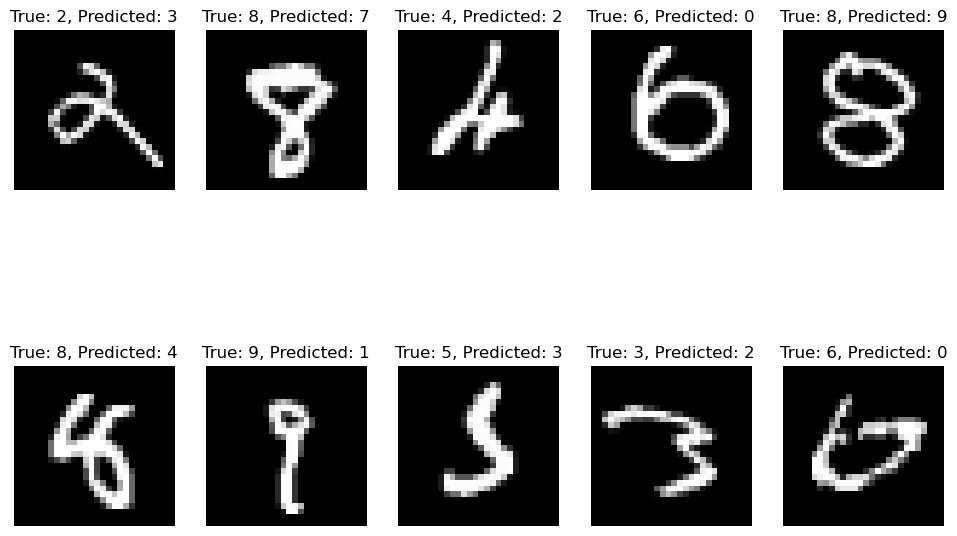

In [25]:
# Misclassified images
def plot_misclassified(images, true_labels, predicted_labels):
    misclassified_indices = np.where(predicted_labels != true_labels)[0]

    plt.figure(figsize=(12, 8))
    for i, index in enumerate(misclassified_indices[:10]):  # Plot the first 10 misclassified images
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[index].reshape((28, 28)), cmap='gray')
        plt.title(f"True: {true_labels[index]}, Predicted: {predicted_labels[index]}")
        plt.axis('off')

    plt.show()


plot_misclassified(test_images, test_labels, predicted_labels)
